<a href="https://colab.research.google.com/github/JesseLynch37/Math152/blob/main/Exploration_2_Newtons_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Exploration 2 - The Programmers
##Newton's Method
###By Jesse Lynch, Alexei Pelyushenko, Gavin Moss, and Tanner Boyea
A look into approximating the roots of polynomial functions and extending the method to complex numbers. <br><br> 

##About this exploration:
Newton's Method is an algorithm used to approximate the roots of a differentiable function.

The method goes as followed:


1.   First, you start with a guess. Any guess will do, as long as the function's derivative at that point is non-zero. Let's call this guess $x_n$.
2.   Then, you calculate the functions value and derivative at that point, let's call them $f(x_n)$ and $f'(x_n)$
3.   After this, you find the next term by $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$.
4.   Repeat step 3 until sufficient precision is reached.

This exploration will explore two results of this process.

First, we will visualize the basins of attraction for each root of a polynomial in the complex plain. In other words, we will assign each complex root of a polynomial with a color, then create an image displaying which root each complex starting guess leads to when Newton's Method is applied to it.

Second, we will visualize how many steps of Newton's Method it takes each complex starting guess to get within 15 digits of precision.



#Creating the tools needed to explore Newton's Method:

###First, we will need to import all packages we plan on using


*   numpy will be used to multiply lists and initialize the array of pixels
*   matplotlib.pyplot will be used to visualize the steps of convergence
*   PIL will be used to visualize the basins of attraction



In [ ]:
# Importing needed packages
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

###Since we will only be working with polynomials, we need to create two functions.


1.   A function that is able to calculate $f(x)$ using $x$ and the coefficients of polynomial $f$.
2.   A function that is able to calculate $f'(x)$ using $x$ and the coefficients of polynomial $f$.



In [ ]:
# A function that takes in the coefficients of a polynomial and an x value, then returns the polynomial's value at that x value
def poly_point(poly_coeffs, x):
  degree = len(poly_coeffs) - 1
  result = 0
  for i in range(degree + 1):
    result += poly_coeffs[i] * x ** (degree - i)
  return result

# A function that takes in the coefficients of a polynomial and an x value, then returns the polynomial's derivative at that x value
def poly_dev(poly_coeffs, x):
  new_coeffs = np.arange(len(poly_coeffs))[:0:-1] * np.array(poly_coeffs)[:-1]
  return poly_point(new_coeffs, x)

###Using these two functions, we are able to create a new function that repeatedly applies Newton's Method until terminal behavior is reached.

In [ ]:
# A function that takes in the coefficients of a polynomial, an x value, and a number of steps, then applies Newton's Method for the amount of steps or until terminal behaivor is reached (to 15 digits of precision)
def poly_newton(poly_coeffs, x, steps=100):
  x0 = x
  x_list = []
  for i in range(steps):
    x0 -= poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)  # Newton's Method: x1 = x0 - f(x0) / f'(x0)
    if x0 in x_list:  # If x0 ever becomes what it was before (to 15 digits of precision), then it will begin repeating itself and more calculations are not needed
      return x0
    x_list.append(x0)  # Adds each x0 to a list
  return x0  # If all of the steps are completed without a repeat x0 being found, returns last x0

#Visualising the complex basins of attraction:
Now we have all the tools needed to create a function that shows which root every complex number in a grid is attracted to.

In [ ]:
def complex_NM(poly_coeffs, xy_min, xy_max, x_res, y_res=1, steps=100):
  # If the vertical resolution is not specified, this gives it a resolution proportional to the horizontal resolution
  if y_res:
    y_res = int(x_res * (xy_max[1] - xy_min[1]) / (xy_max[0] - xy_min[0]))
  print(x_res, y_res)  # Prints what the resolution of the image will be

  # Initializes all real and imaginary parts of x that will be used, according to the resolution and specifed region
  x_reals = np.linspace(xy_min[0], xy_max[0], x_res)
  x_imags = np.linspace(xy_min[1], xy_max[1], y_res)

  # Initializes an array that will contain all complex values of x
  x_values = np.zeros([y_res, x_res], dtype='complex128')

  # Fills in the array with all real and imaginary parts of x
  for j in range(x_res):
    x_values[:, j].real = x_reals[j]
  for i in range(y_res):
    x_values[i, :].imag = x_imags[i]

  # Initializes the image array
  img_arr = np.zeros([y_res, x_res, 3], dtype='uint8')

  # Calculates several variables that will be used later
  roots = np.roots(poly_coeffs)
  print(roots)  # Prints the complex roots of the polynomial, which may be useful when looking at the final image
  real_min = min(roots.real)
  real_max = max(roots.real)
  imag_min = min(roots.imag)
  imag_max = max(roots.imag)
  
  real_mid = (real_min + real_max) / 2
  imag_mid = (imag_min + imag_max) / 2

  e = 2.71828
  p = (real_min - real_max) / 2.7726
  q = (imag_min - imag_max) / 2.7726
  # See text box below for significance of these variables

  # Creates the image
  for i in range(y_res):
    if i % 10 == 0:
      print(i, end='  ')
      # Prints the number of completed rows every 10 completed rows
    for j in range(x_res):
      complex_x = poly_newton(poly_coeffs, x_values[i, j], steps)  # Performs Newton's Method on every pixel
      img_arr[i, j] = [int(256 / (1 + e ** ((complex_x.real - real_mid) / p))), 0, int(256 / (1 + e ** ((complex_x.imag - imag_mid) / q)))]  # Assigns the pixel a color according to the result of Newton's Method
      # See text box below for explanation

  # Displays image
  img = Image.fromarray(img_arr)
  display(img)

While programming this function, I came across a very peculiar problem.

I had to assign a unique RGB color to every complex number that might result from performing Newton's Method.

The "expected" outcomes of the Newton's Method function are easy to find. By simply using np.roots([poly_coefficients]), the complex roots of the polynomial could be found. However, mapping each precise root to a color would not suffice since the outcome may very well be **ANY** complex number.

To simplify things, let's have the real part correspond to a red value, and the imaginary part correspond to a blue value.

So, I then had to find a create function that has a domain of all real numbers, has a codomain of integers in [0, 255], and whose outputs are most distinguishable around the "expected" values.

These requirements reminded me of the logistics curve.

$f(x) = \frac{1}{1+e^{-x}}$

This curve collapses the entire real domain into an always-increasing line that stays between 0 and 1.

For both the real and imaginary parts, let's have the smallest "expected" value map to 20% the maximum output value, and the largest "expected" value to map to 80% the maximum output value.

To know how to shift and strech the curve in order to fit these requirements, we must solve the following system of equations:

$f(x_0) = \frac{1}{1+e^\frac{{x_0 - a}}{b}} = 0.2$ and

$f(x_1) = \frac{1}{1+e^\frac{{x_1 - a}}{b}} = 0.8$.

The variable $a$ represents a horizontal shifting factor, and variable $b$ represents a streching factor, while $x_0$ and $x_1$ represent the minimum and maximum "expected" values.

Solving this system for $a$ and $b$ shows the following:

$a = \frac{x_0 + x_1}{2}$  (this is the same as the midpoint between the maximum and minimum "expacted" values).

$b = \frac{x_0 - x_1}{4\ln{2}}$  (this is where the 2.7726 number comes from in the function).

Finally, taking the floor of 255 times this function allows us to interpret its output as a color value.

See this Desmos to see a demonstration of this in action:
https://www.desmos.com/calculator/r6bdto1nzl

###Now that we have formed our function, let's test it out.

250 166
[ 2.+3.j  2.-3.j -3.+0.j]
0  10  20  30  40  50  60  70  80  90  100  110  120  130  140  150  160  

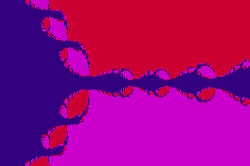

In [ ]:
# Let's test this on the polynomial z = x^3 - x^2 + x + 39 from -5-5j to 10+5j
coeffs = [1, -1, 1, 39]
complex_NM(coeffs, [-5, -5], [10, 5], 250, steps=200)

###Now that we see that the function can successfully visualize basins of attraction, let's have it create a high-resolution image that looks nice.
This may take some time, however, so be careful not to run the following box of code unless you have some time.

1000 1000
[-1.55299029+0.j          1.45422959+1.07056853j  1.45422959-1.07056853j
  0.32226556+1.13066849j  0.32226556-1.13066849j]
0  10  20  30  40  50  60  70  80  90  100  110  120  130  140  150  160  170  180  190  200  210  220  230  240  250  260  270  280  290  300  310  320  330  340  350  360  370  380  390  400  410  420  430  440  450  460  470  480  490  500  510  520  530  540  550  560  570  580  590  600  610  620  630  640  650  660  670  680  690  700  710  720  730  740  750  760  770  780  790  800  810  820  830  840  850  860  870  880  890  900  910  920  930  940  950  960  970  980  990  

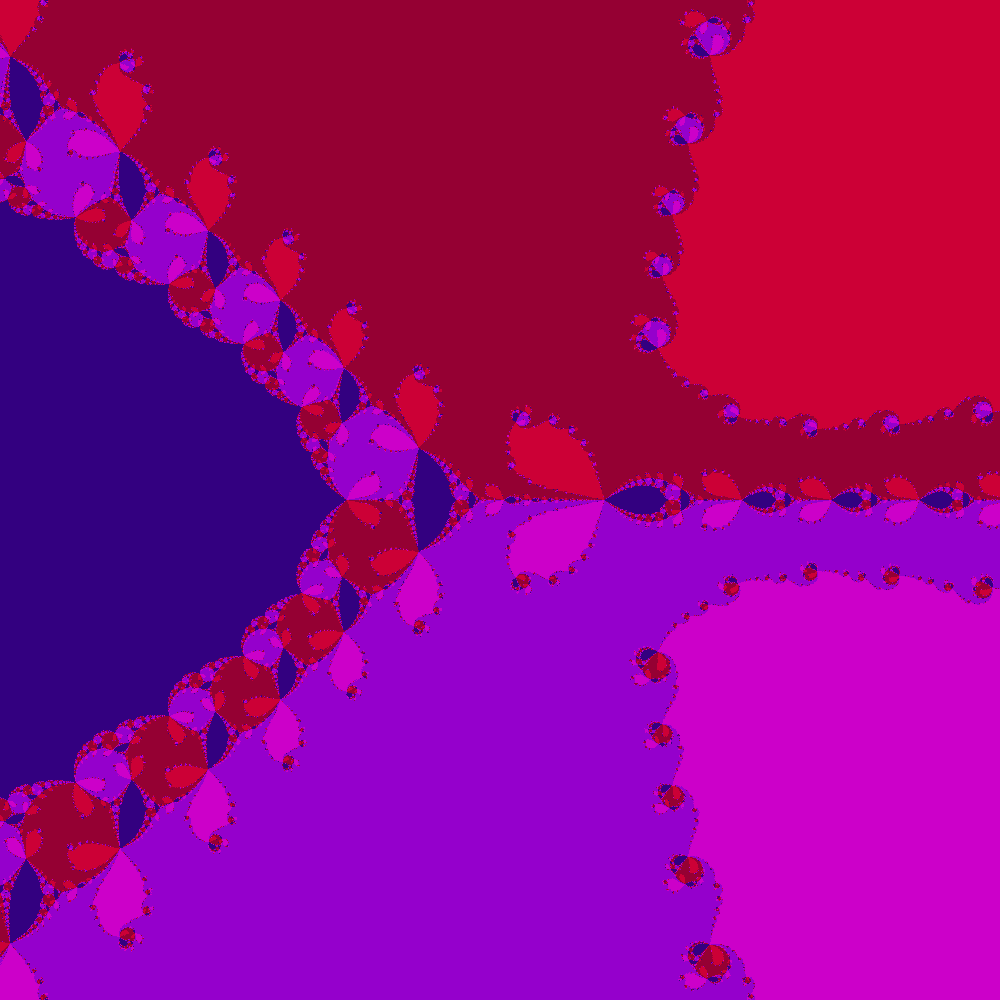

In [ ]:
# Thats great, but let's step it up a notch
# WARNING: very long run-time
coeffs = [1, -2, 1, 4, -5, 7]
complex_NM(coeffs, [-3, -3], [3, 3], 1000, steps=100)

While this image is very pretty, its resolution is still lacking.

I had my computer run overnight to produce an image with 100x the pixels.

Here is the result. Remember to zoom in and let Google Drive finish rendering.

https://drive.google.com/file/d/1i9t1G0wa-3C4JVY8TA3n46o3miMc2JR5/view?usp=sharing

#Visualizing the number of steps needed:
We will have to somewhat modify our existing functions and use hexbins in order to gauge how many steps it take a particular initial guess to get within 15 digits of precision.

###First, let's modify poly_newton to return the number of steps needed rather than the root it converges to

In [ ]:
'''
A function that takes in the coefficients of a polynomial, an x value, and a maximum number of steps,
then applies Newton's Method for the amount of steps or until terminal behaivor is reached
(to n digits of precision), then return the number of steps taken
'''
def poly_newton_steps(poly_coeffs, x, n=15, steps=100):
  x0 = x
  x_list = []
  for i in range(steps):
    x0 -= poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)  # Newton's Method: x1 = x0 - f(x0) / f'(x0)
    if np.round(x0, n) in x_list:  # If x0 ever becomes what it was before (to 15 digits of precision), then it will begin repeating itself and more calculations are not needed
      return i
    x_list.append(np.round(x0, n))  # Adds each x0 to a list
  return steps  # If all of the steps are completed without a repeat x0 being found, returns last x0

###Next, let's modify complex_NM to return the 2D arrays of the inital guesses and steps taken.

In [ ]:
def complex_NM_steps(poly_coeffs, xy_min, xy_max, x_res, y_res=1, steps=100, n=15):
  # If the vertical resolution is not specified, this gives it a resolution proportional to the horizontal resolution
  if y_res:
    y_res = int(x_res * (xy_max[1] - xy_min[1]) / (xy_max[0] - xy_min[0]))
  print(x_res, y_res)  # Prints what the resolution of the image will be

  # Initializes all real and imaginary parts of x that will be used, according to the resolution and specifed region
  x_reals = np.linspace(xy_min[0], xy_max[0], x_res)
  x_imags = np.linspace(xy_min[1], xy_max[1], y_res)

  # Initializes an array that will contain all complex values of x
  x_values = np.zeros([y_res, x_res], dtype='complex128')

  # Fills in the array with all real and imaginary parts of x
  for j in range(x_res):
    x_values[:, j].real = x_reals[j]
  for i in range(y_res):
    x_values[i, :].imag = x_imags[i]

  # Prints the complex roots of the polynomial, which may be useful when looking at the final image
  roots = np.roots(poly_coeffs)
  print(roots)

  # Creates the image
  for i in range(y_res):
    if i % 10 == 0:
      print(i, end='  ')
      # Prints the number of completed rows every 10 completed rows
    for j in range(x_res):
      steps_needed = poly_newton_steps(poly_coeffs, x_values[i, j], n, steps)  # Performs Newton's Method on every pixel
      steps_arr[i, j] =  steps_needed

  return [x_values, steps_arr]

###Finally, let's use hexbins to create a heatmap showing how many steps each initial guess takes to converge.

1500 1500
[-1.55299029+0.j          1.45422959+1.07056853j  1.45422959-1.07056853j
  0.32226556+1.13066849j  0.32226556-1.13066849j]
0  10  20  30  40  50  60  70  80  90  100  110  120  130  140  150  160  170  180  190  200  210  220  230  240  250  260  270  280  290  300  310  320  330  340  350  360  370  380  390  400  410  420  430  440  450  460  470  480  490  500  510  520  530  540  550  560  570  580  590  600  610  620  630  640  650  660  670  680  690  700  710  720  730  740  750  760  770  780  790  800  810  820  830  840  850  860  870  880  890  900  910  920  930  940  950  960  970  980  990  1000  1010  1020  1030  1040  1050  1060  1070  1080  1090  1100  1110  1120  1130  1140  1150  1160  1170  1180  1190  1200  1210  1220  1230  1240  1250  1260  1270  1280  1290  1300  1310  1320  1330  1340  1350  1360  1370  1380  1390  1400  1410  1420  1430  1440  1450  1460  1470  1480  1490  

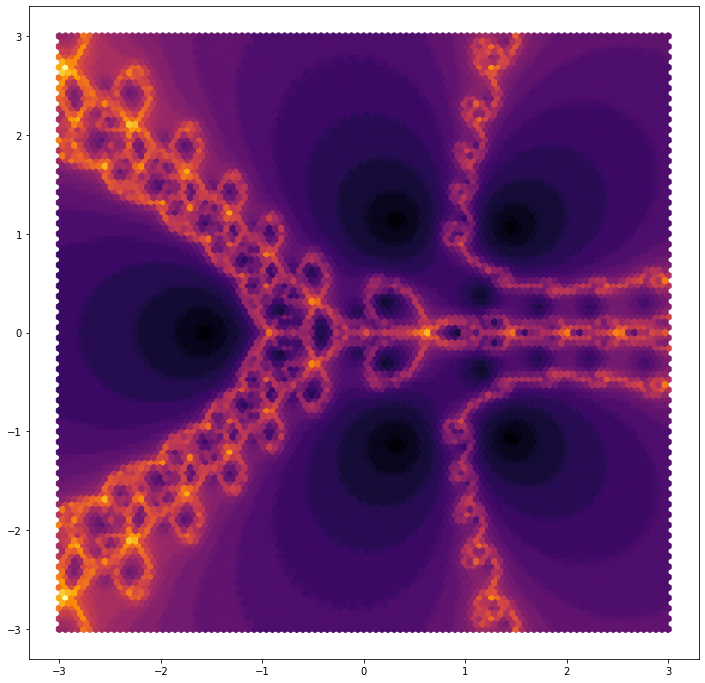

In [ ]:
# Shows a heatmap that represents how many steps it takes to converge to 15 digits of precision
coeffs = [1, -2, 1, 4, -5, 7]
[complex_x_values, steps_arr] = complex_NM_steps(coeffs, [-3, -3], [3, 3], 1500, steps=150)

x_values = np.ndarray.flatten(complex_x_values.real)
y_values = np.ndarray.flatten(complex_x_values.imag)

steps_arr = np.ndarray.flatten(steps_arr)

plt.figure(figsize=(12, 12))
plt.hexbin(x_values, y_values, C=steps_arr, cmap='inferno')

From this, we can clearly see the complex roots of the polynomial, which are the darkest parts of the plot. We also observe that it takes the most steps to converge around complicated parts of the fractal, especially at the base of petals.